# Stærðfræði og reiknifræði – Skiladæmi 7

In [38]:
#BYRJA -- Keyrið til að frumstilla.
import numpy as np, numpy.random as npr, numpy.linalg as la
import scipy.stats as st, statsmodels.api as sm, scipy.optimize as opt
import matplotlib.pyplot as plt
plt.rc('axes', axisbelow=True)
%matplotlib inline
# disp(x,y...) skrifar x,y... með 3 aukastöfum
def disp(*args): print(*(f'{a:.3f}' if isinstance(a,float) else a for a in args))
np.set_printoptions(precision=4, floatmode='fixed', suppress=True

## 1. Ýmsar viguraðgerðir
Lát $n = 100$ og $x = (1,\ldots,n)$ og $y = (1, 1/2,\ldots,1/n)$. Reiknið í Python:

**a)** Lengd $x$, meðaltal, staðalfrávik og dreifni<br>
**b)** Fjarlægð, fylgni og horn milli $x$ og $y$<br>
**c)** Fjarlægðina milli Reykjavíkur og Akureyrar í beinni loftlínu

*Ef þið finnið hnattstöðuna með Google maps er hún gefin sem tugabrot en ef þið flettið henni upp á netinu er ekki ólíklegt að þið fáið gráður, mínútur og sekúndur, t.d. 64° 15´ 30´´ sem (ef við sleppum sekúndunum) jafngildir 64 + 15/60 = 64.25°*

In [58]:
# a
n = 100
x = np.arange(1,n+1,1)
y = np.linspace(1,100,100)
for i in range(n):
        y[i] = 1/x[i]
lengdx = la.norm(x)
lengdy = la.norm(y)
meanx = np.mean(x)
stdx = np.std(x)
varx = np.var(x)
(r,p) = st.pearsonr(x, y)
print(f'Lengd x: {lengdx:.2f}\nMedaltal x: {meanx}\nStadalfravik x: {stdx:.2f}\nDreifni x: {varx}\nFylgni x: {r:.2f}')
# b
dist = la.norm(x-y)
#fylgni = np.corrcoef(x,y)
# horn
teljari = x@y
nefnari = lengdx*lengdy
rad = teljari/nefnari
horn = np.degrees(rad)
print(f'Fjarlaegd: {dist:.2f}')
print(f'Horn a milli x og y: {horn:.2f}')

Lengd x: 581.68
Medaltal x: 50.5
Stadalfravik x: 28.87
Dreifni x: 833.25
Fylgni x: -0.48
Fjarlaegd: 581.51
Horn a milli x og y: 7.70


In [9]:
# c
def sind(x):
    """Skilar sin(x gráður)"""
    return np.sin(np.radians(x))

def cosd(x):
    """Skilar cos(x gráður)"""
    return np.cos(np.radians(x))
R = 6370
bRvk = 64
lRvk = 22
bAKcity = 65.4
lAKcity = 18.6
x = np.array([
    R*sind(lRvk)*cosd(bRvk),
    R*cosd(lRvk)*cosd(bRvk),
    R*sind(bRvk)
])
y = np.array([
    R*sind(lAKcity)*cosd(bAKcity),
    R*cosd(lAKcity)*cosd(bAKcity),
    R*sind(bAKcity)
])
theta = np.arccos( (x@y)/(la.norm(x)*la.norm(y)) )
D = np.degrees(theta)
disp(D)
L = R*theta
print(f'Lengd milli RVK og AK: {L:.2f} km')

2.017
Lengd milli RVK og AK: 224.27 km


## 2. Lágmörkun með stigli
**a)** Í skiladæmi 5.B1 var stigull (*gradient*) Rosenbrock-fallsins, $f(x, y) = (1 - x)^2 + 100(y - x^2)^2$ reiknaður og útkoman var 

$$\nabla f(x,y) = \pmatrix{2x - 2 - 400x(y - x^2) \\ 200(y - x^2)}$$

Ef við umritum formúlurnar með því að skrifa $(x_0, y_0)$ í stað $(x,y)$ og skilgreina $x = (x_0, y_0)$ fæst

$$\begin{align}f(x) &= (1-x_0)^2 + 100(x_1 - x_0^2)^2 \\
        \nabla f(x) &= \pmatrix{2x_0 - 2 - 400x_0(x_1 - x_0^2) \\ 200(x_1 - x_0^2)}\end{align}$$
        
Skrifið Python föll `f(x)` og `g(x)` sem reikna fallsgildi og stigul Rosenbrock-fallsins.

**b)** `opt.minimize` hefur valkvæðan stika `jac` sem er nafn falls sem reiknar stigul fallsins sem á að lágmarka (*jac* er stytting á *Jacobian*, sem fyrir $f\colon\Bbb{R}\to\Bbb{R^2}$ er samheiti við *gradient*). Með *jac*-stika verður lágmörkunarkallið:

        result = opt.minimize(f, x0, jac=g)
        
Ef `opt.minimize` hefur aðgang að stiglinum þá þarf mun færri köll á fallið til að finna lággildið. Ákvarðið lággildi Rosenbrock-fallsins ef byrjað er í $x_0=(-1.2, 1)$ bæði með og án stigul-falls, og finnið út hve margar ítrekanir og köll á `f` þarf í hvoru tilviki fyrir sig.

In [223]:
# a
def f(x):
    return ( 1 - x[0] )**2 + 100*( x[1] - x[0]**2 )**2
def g(x):
    y = np.array([
        2*x[0] - 2 - 400*x[0]*(x[1] - x[0]**2),
        200*(x[1] - x[0]**2)
    ])
    return y
x0 = np.array([-1.2, 1])
x1 = g(x0)
print ( g(x0) )
result = opt.minimize(f, x0, jac=g, options={'disp': True})
print( result )
#sesult = opt.minimize(f, x1, jac=g)

[-215.600  -88.000]
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 32
         Function evaluations: 39
         Gradient evaluations: 39
      fun: 2.5353055595473786e-15
 hess_inv: array([[0.502, 1.003],
       [1.003, 2.010]])
      jac: array([-0.000,  0.000])
  message: 'Optimization terminated successfully.'
     nfev: 39
      nit: 32
     njev: 39
   status: 0
  success: True
        x: array([1.000, 1.000])


## 3. Næsti nágranni
Þetta dæmi tengist greinunum *Nearest neighbor* og *Document dissimilarity* á bls. 50–51 í kennslubók. Í skránni `wikitíðni.npz` (*npz* er sérstakt Numpy-zip-snið) er búið að safna saman upplýsingum um tíðni 1000 orða í 300 Wikipedia-greinum sem skiptast í 5 flokka (Pokemon, veðurfræði, listir, stofnanir Sameinuðu þjóðanna, og rafmagnsverkfræði). Algengum orðum s.s. "the", "in", "of" hefur verið sleppt. Í heimadæmum 8 verður reynt að finna í hvaða flokki hver grein er, en hér látum við duga að kynnast gögnunum örlítið og æfa okkur í að finna næsta granna. Gögnin má lesa inn og skoða gróflega með:

In [107]:
np.set_printoptions(precision=3)
data = np.load('wikitidni.npz')
ord = data["dictionary"]
greinar = data["article_titles"]
tidni = data["article_histograms"]

disp('Fjöldi orða:  ', len(ord))
disp('Fjöldi greina:', len(greinar))
disp('Stærð fylkis: ', np.shape(tidni))
disp(greinar[::20])    # tuttugasta hver grein
disp(ord[-20:])        # síðustu tuttugu orðin
disp(tidni[:9,:8])     # tidni fyrstu 9 orðanna í fyrstu 10 greinunum
x0 = tidni[0]          # 1000-staka vigur með orðtidni í fyrstu greininni
x1 = tidni[1]          # 1000-staka vigur með orðtidni í annarri greininni
s = sum(tidni,0)       # 1000-staka vigur með summu staka í hverjum dálki fylkisins
I = np.argsort(x0)     # númer orða í fyrstu greininni í röð ef eftir algengi
disp('||x0 - x1|| =', la.norm(x0-x1))   # fjarlægð milli x0 og x1
disp('Algengustu orð í grein 0:', ord[I[-10:]])

Fjöldi orða:   1000
Fjöldi greina: 300
Stærð fylkis:  (300, 1000)
['A Bar at the Folies-Bergère' 'Baroclinity' 'Complementary colors'
 'Effect of sun angle on climate' 'Frequency-shift keying'
 'Ice accretion indicator' 'International Trade Centre'
 'Luncheon of the Boating Party' 'Neo-impressionism' 'Plant'
 'Precipitation' 'Space weather' 'Transmitter'
 'United Nations Industrial Development Organization' 'Weather map']
['wet' 'white' 'wide' 'widely' 'wind' 'winds' 'winter' 'wire' 'wireless'
 'women' 'working' 'works' 'worldwide' 'wrote' 'wto' 'year' 'yellow'
 'york' 'young' 'zero']
[[0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000]
 [0.000 0.017 0.000 0.000 0.000 0.000 0.000 0.012]
 [0.000 0.012 0.000 0.005 0.000 0.015 0.000 0.006]
 [0.000 0.000 0.032 0.000 0.000 0.000 0.000 0.039]
 [0.000 0.019 0.034 0.000 0.000 0.000 0.000 0.000]
 [0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000]
 [0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000]
 [0.000 0.025 0.000 0.000 0.000 0.000 0.012 0.000]


In [209]:
# Prófa Nearest Neighbour
n = 5 # lengd vigra
m = 5 # fjoldi vigra
z = np.random.rand(m,n)
x = np.array([2.0,3.0,4.0,5.0,7.0])
for i in range(1,n):
    for j in range(1,m):
        if la.norm(x - z[j]) <= la.norm(x - z[i]):
            print(f'Neighb: {z[j]}')
# Ég á að fá einn vigur úr þessu. Þetta skilar mér 10...

Neighb: [0.216 0.837 0.871 0.801 0.853]
Neighb: [0.216 0.837 0.871 0.801 0.853]
Neighb: [0.484 0.741 0.751 0.328 0.416]
Neighb: [0.708 0.154 0.448 0.642 0.950]
Neighb: [0.216 0.837 0.871 0.801 0.853]
Neighb: [0.484 0.741 0.751 0.328 0.416]
Neighb: [0.304 0.113 0.693 0.346 0.313]
Neighb: [0.708 0.154 0.448 0.642 0.950]
Neighb: [0.216 0.837 0.871 0.801 0.853]
Neighb: [0.708 0.154 0.448 0.642 0.950]
0.00332018248011


**a)** Skrifið út síðustu 20 greinarnar og 20. hvert orð<br>
**b)** Um hvað er grein númer 0?<br>
**c)** Finnið titil greinarinnar sem er næst grein 0 (*nearest neighbour*) ef við mælum fjarlægð með normi af mismun milli orðtíðnivigra (gildir 2 stig).<br>
**d)** Finnið þau 10 orð sem hafa hæstu samanlagða tíðnina (notið `np.argsort` og vigurinn `s`)<br>
**e)** Notið `plt.spy` með `figsize=(1,5)` til að skoða fylkið `tíðni`.

['Weather map' 'Weather modification' 'Weather radar' 'Wet-on-wet'
 'Wide area network' 'Wind chill' 'Wind direction' 'Windsock' 'Wind speed'
 'Winter storm' 'Wireless'
 'Woman with a Parasol - Madame Monet and Her Son' 'World Bank Group'
 'World Food Programme' 'World Health Organization'
 'World Intellectual Property Organization'
 'World Meteorological Organization' 'World Tourism Organization'
 'World Trade Organization' 'Zapdos']
['000' '2013' 'additional' 'altitude' 'art' 'away' 'bodies' 'cards'
 'channels' 'collection' 'conference' 'cover' 'density' 'dioxide'
 'effective' 'error' 'famine' 'flow' 'french' 'glass' 'headquarters' 'ifc'
 'influence' 'italy' 'landscapes' 'legal' 'long' 'maximum' 'microwave'
 'mpls' 'normal' 'open' 'particular' 'pissarro' 'position' 'problems'
 'provides' 'received' 'relative' 'response' 'sapphire' 'series' 'smaller'
 'speeds' 'study' 'technology' 'trade' 'typical' 'velocity' 'wet']
A Bar at the Folies-Bergère
232.13866545666193
The Child's Bath
['fam

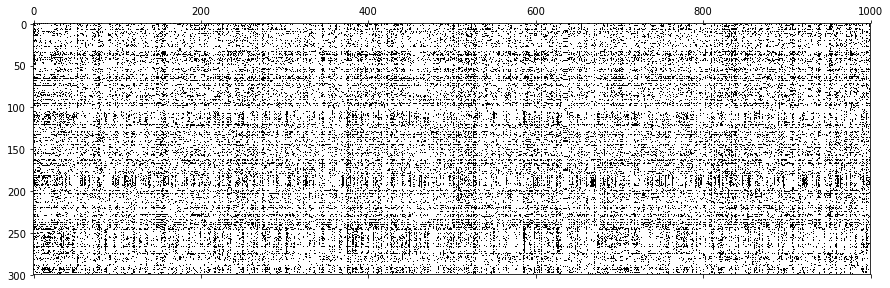

In [221]:
# a 
print( greinar[-20:] )
print( ord[::20] )
# b
print( greinar[0] )
# c
n = len(ord)
m = len(greinar)
x = greinar[0]
mismun = la.norm(x0-x1)
print( mismun )
print( greinar[int(mismun)] ) # eitthvað nálægt réttu svari?
mintidni = tidni.argmin()
# c2
#for i in range(tidni.shape[0]):
#    for j in range(len(greinar)):
#        if la.norm(greinar[0] - tidni[j]) <= la.norm(greinar[0] - tidni[i]):
#            print(tidni[j])
# ég er alveg stopp á þessu dæmi
# d
lindex = np.argsort(s)
index = lindex[:10]
print( ord[index] )
# e
plt.figure(figsize=(15,5))
plt.spy(tidni);